# CHURN MODELLING

In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv('churn_modelling(1).csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [110]:
data.shape

(10000, 14)

In [111]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [112]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##DATA ANALYSIS

In [113]:
# Printing Unique Values of the categorical variables
print(data['Geography'].unique())
print(data['Gender'].unique())
print(data['NumOfProducts'].unique())
print(data['HasCrCard'].unique())
print(data['IsActiveMember'].unique())


['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [114]:
# Checking if there are null values or not
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [115]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

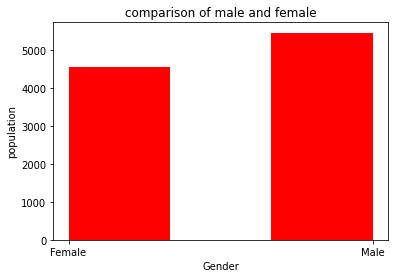

In [116]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'red')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [117]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

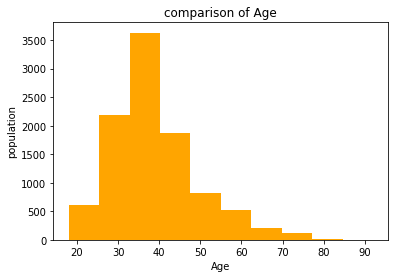

In [118]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [119]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

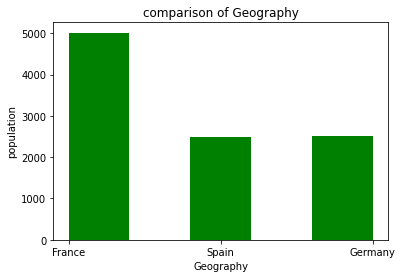

In [120]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [121]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

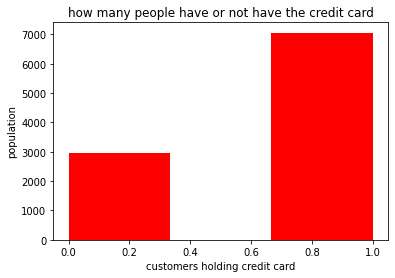

In [122]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [123]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

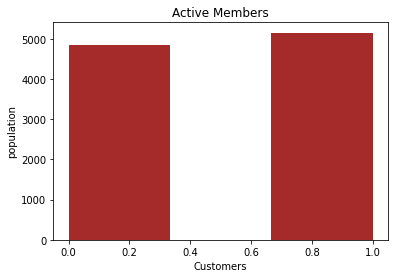

In [124]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

In [125]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

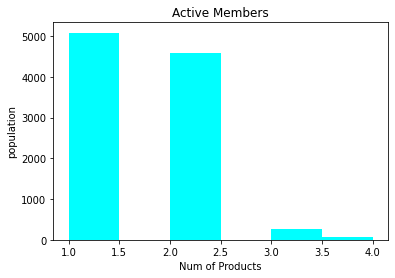

In [126]:
# How many Num of Products  bank have  ?

plt.hist(x = data.NumOfProducts, bins = 6, color = 'cyan')
plt.title('Active Members')
plt.xlabel('Num of Products')
plt.ylabel('population')
plt.show()

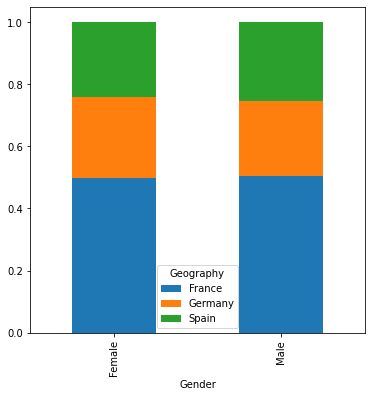

In [127]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

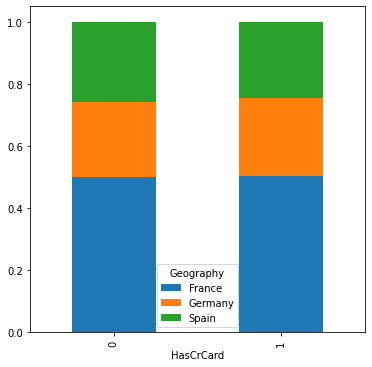

In [128]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

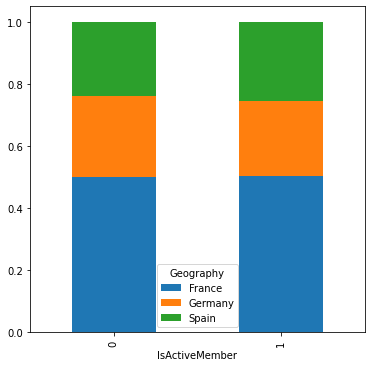

In [129]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

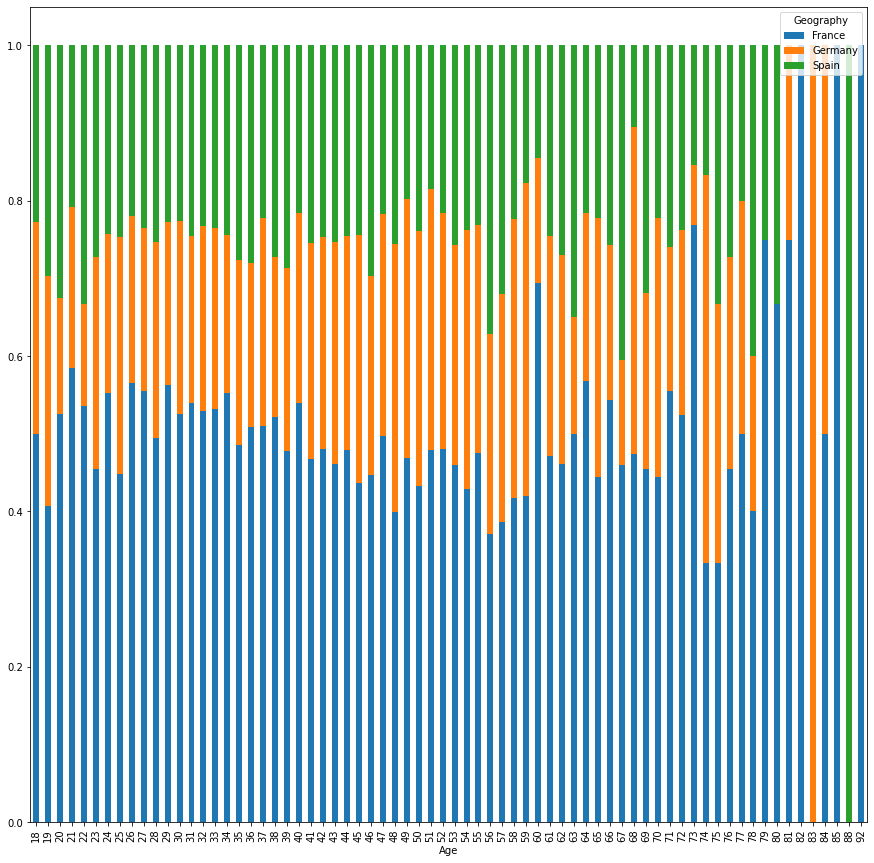

In [130]:
# comparing ages in different geographies

Age = pd.crosstab(data['Age'], data['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,15))

In [131]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


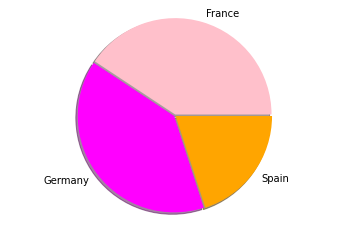

In [132]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['pink', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

In [133]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [134]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [135]:
data.shape

(10000, 11)

In [136]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [137]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
data = pd.get_dummies(data, drop_first=True)

In [138]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [141]:
data.shape

(10000, 12)

In [142]:

import seaborn as sns

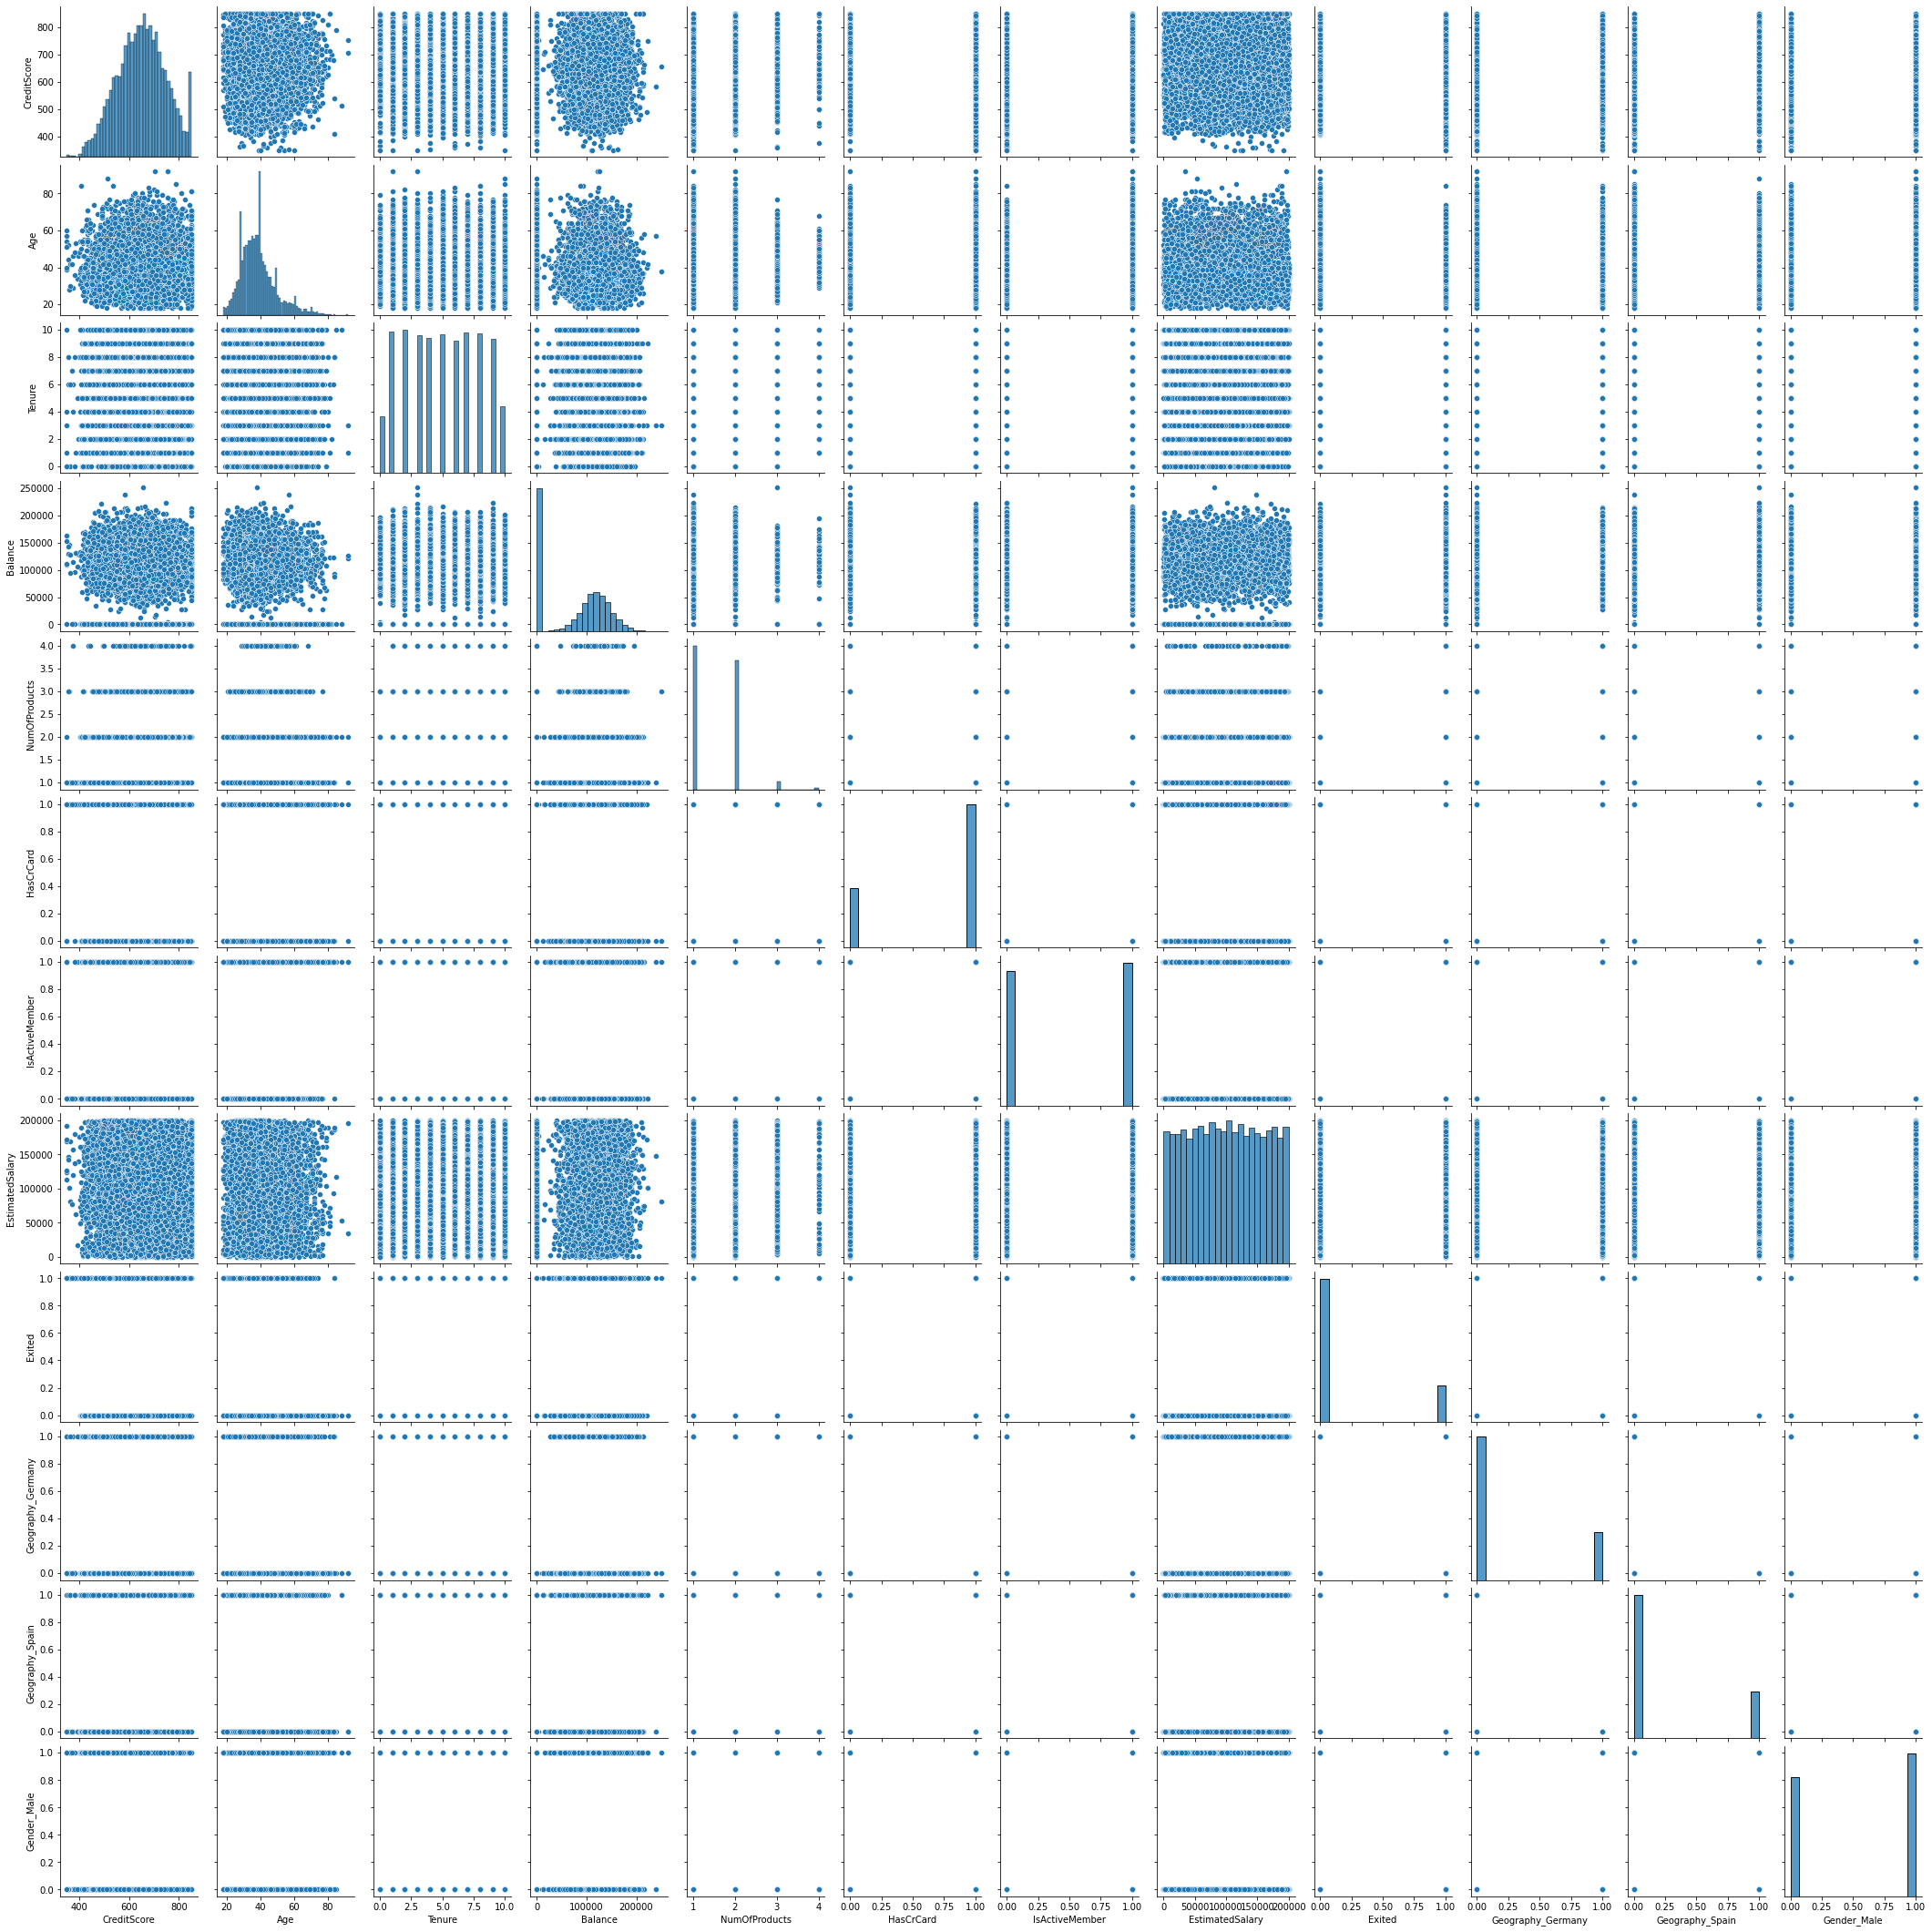

In [143]:
sns.pairplot(data)

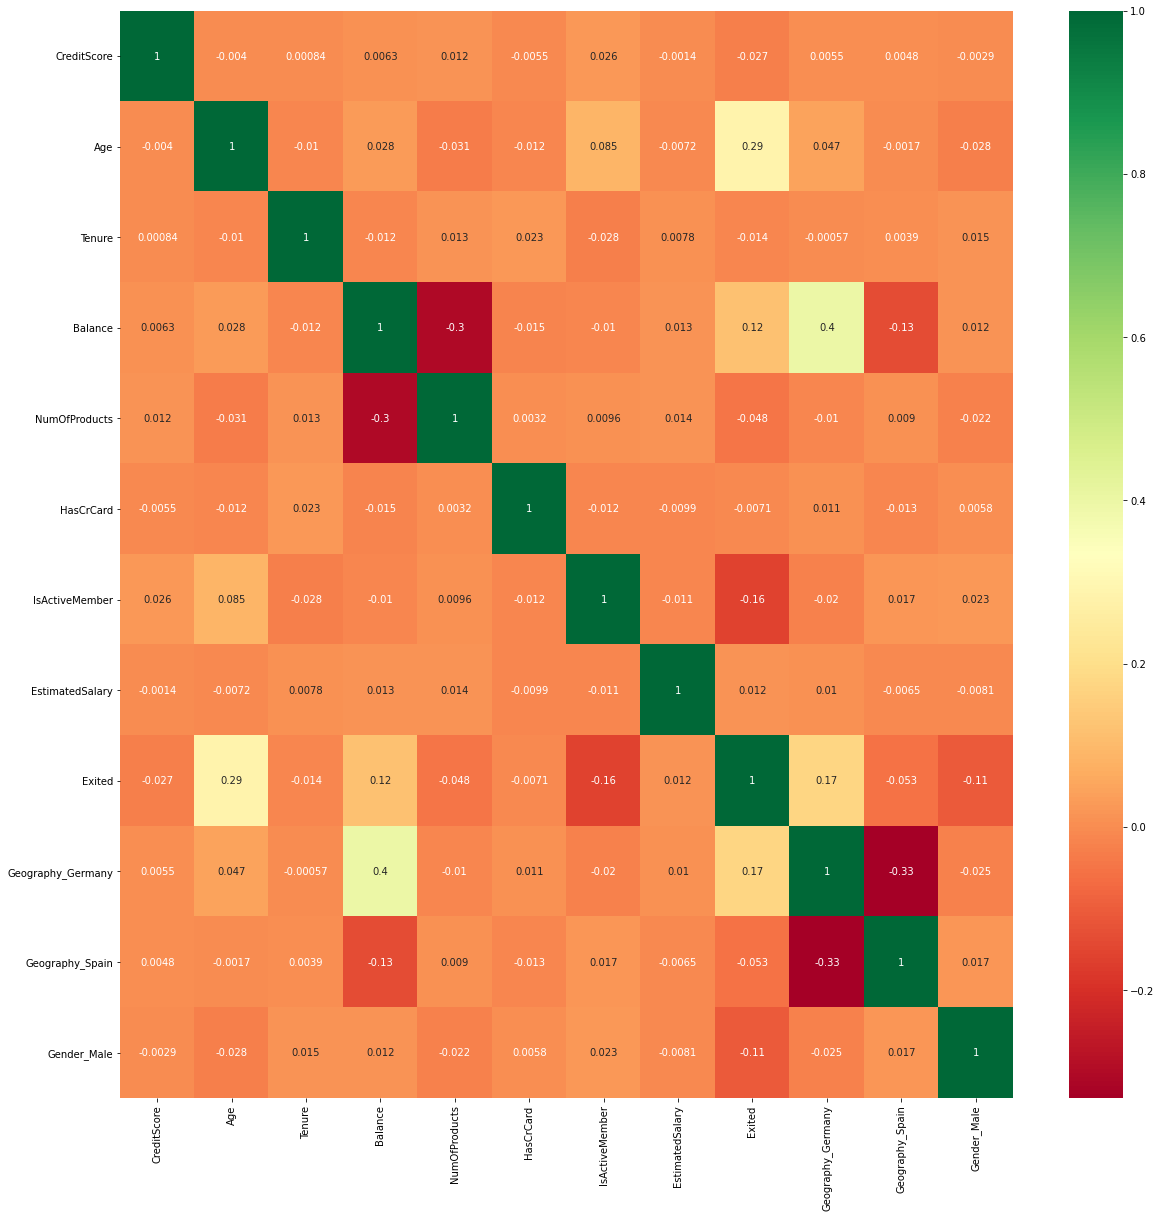

In [144]:
# Plotting The Correlations between all the features
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [145]:

# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values
# splitting the dataset into x(independent variables) and y(dependent variables)

#x = data.iloc[:,0:10]
#y = data.iloc[:,10]

#print(x.shape)
#print(y.shape)

#print(x.columns)
#print(y)

In [146]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [147]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [148]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [149]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


####Feature Scaling

In [150]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687


###Feature Importance

In [151]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [152]:
print(model.feature_importances_)

[0.11983988 0.23592349 0.10314212 0.12937737 0.14194092 0.03173808
 0.04756397 0.11764461 0.02817388 0.02160767 0.02304803]


##MOdelling

##Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
y_pred = rf.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1521   74]
 [ 196  209]]
0.865


In [156]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print(cvs)

[0.87125 0.84875 0.875   0.86    0.855   0.85125 0.86625 0.85    0.855
 0.86625]


In [157]:

print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.859875
Variance : 0.008846786139610248


###Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuaracy :", model.score(X_test, y_test))
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.801
0.801
[[1368  227]
 [ 171  234]]


### k fold cross validation

In [159]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs)

[0.7975  0.76875 0.80875 0.7775  0.79    0.76375 0.8025  0.775   0.75375
 0.80375]


In [160]:

print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.784125
Variance : 0.018010847425926388


###Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8085
Testing Accuracy : 0.813
[[1540   55]
 [ 319   86]]


###Support Vector Machine

In [162]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Training Accuracy :", svm.score(X_train, y_train))
print("Testing Accuracy :", svm.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.866
Testing Accuracy : 0.864
[[1560   35]
 [ 237  168]]


In [163]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print(cvs)

[0.8675  0.85    0.86875 0.8575  0.845   0.84375 0.85625 0.84625 0.83375
 0.855  ]


In [164]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.852375
Variance : 0.010314583122938143


##Multi Layer Perceptron

In [166]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu', 
                      solver = 'adam', max_iter = 50)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8855
Testing Accuracy : 0.864
[[1491  104]
 [ 189  216]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##Artificial Neural Networks

In [167]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [168]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))

# third hidden layer
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))

# fourth hidden layer
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))

# fifth hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(X_train, y_train, batch_size = 10,validation_split=0.25,epochs= 100)

Epoch 1/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7948 - val_loss: 0.4316 - val_accuracy: 0.7995
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.7948 - val_loss: 0.4195 - val_accuracy: 0.7995
Epoch 3/100
600/600 [==============================] - 1s 1ms/step - loss: 0.4112 - accuracy: 0.8018 - val_loss: 0.4100 - val_accuracy: 0.8305
Epoch 4/100
600/600 [==============================] - 1s 1ms/step - loss: 0.4002 - accuracy: 0.8288 - val_loss: 0.3979 - val_accuracy: 0.8290
Epoch 5/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3901 - accuracy: 0.8348 - val_loss: 0.3897 - val_accuracy: 0.8390
Epoch 6/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3811 - accuracy: 0.8478 - val_loss: 0.3809 - val_accuracy: 0.8415
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3752 - accuracy: 0.8480 - val_loss: 0.3780 - val_accuracy: 0.8475

In [169]:
# creating the model
model2 = Sequential()

from keras.layers import Dropout

# first hidden layer
model2.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model2.add(Dropout(0.5))

# second hidden layer
model2.add(Dense(units = 8,   kernel_initializer= 'uniform', activation = 'relu'))
model2.add(Dropout(0.5))

# output layer
model2.add(Dense(units = 1,  kernel_initializer= 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model2.fit(X_train, y_train, batch_size = 10,epochs = 50)

Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 0.5168 - accuracy: 0.7959
Epoch 2/50
800/800 [==============================] - 1s 1000us/step - loss: 0.4590 - accuracy: 0.7960
Epoch 3/50
800/800 [==============================] - 1s 943us/step - loss: 0.4594 - accuracy: 0.7960
Epoch 4/50
800/800 [==============================] - 1s 996us/step - loss: 0.4538 - accuracy: 0.7960
Epoch 5/50
800/800 [==============================] - 1s 993us/step - loss: 0.4571 - accuracy: 0.7960
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4580 - accuracy: 0.7960
Epoch 7/50
800/800 [==============================] - 1s 971us/step - loss: 0.4555 - accuracy: 0.7960
Epoch 8/50
800/800 [==============================] - 1s 943us/step - loss: 0.4547 - accuracy: 0.7960
Epoch 9/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4510 - accuracy: 0.7960
Epoch 10/50
800/800 [==============================] - 1s 998us/step - loss: 0.4530 - a

In [170]:
# creating the model
model3 = Sequential()

# first hidden layer
model3.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model3.add(Dropout(0.1))

# second hidden layer
model3.add(Dense(units = 8,kernel_initializer= 'uniform', activation = 'relu'))
model3.add(Dropout(0.1))

# output layer
model3.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model3.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4768 - accuracy: 0.7959
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.7960
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4266 - accuracy: 0.7960
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.8126
Epoch 5/50
800/800 [==============================] - 1s 998us/step - loss: 0.4222 - accuracy: 0.8265
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8265
Epoch 7/50
800/800 [==============================] - 1s 983us/step - loss: 0.4215 - accuracy: 0.8288
Epoch 8/50
800/800 [==============================] - 1s 994us/step - loss: 0.4228 - accuracy: 0.8295
Epoch 9/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.8299
Epoch 10/50
800/800 [==============================] - 1s 983us/step - loss: 0.4199 - accuracy

###Predicting results

In [171]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [172]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 3, 1, 1, 85000, 1, 0, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

[[ True]]


In [173]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = rf.predict(sc.transform(np.array([[850, 50, 4, 150000, 3, 1, 1, 85000, 1, 0, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

[ True]


In [174]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = svm.predict(sc.transform(np.array([[850, 50, 4, 150000, 3, 1, 1, 85000, 1, 0, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

[ True]


In [175]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = mlp.predict(sc.transform(np.array([[850, 50, 4, 150000, 3, 1, 1, 85000, 1, 0, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

[ True]


**Here we See Random Forests ,Decision Tress, ANN model without dropout and MultiLayer Perceptron(MLP) performs Good As comapred ANN(another models) and Other classification algorithms**

In [176]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from keras.layers import Dense
from keras.models import Sequential

def build_classifier():
  # creating the model
  model1 = Sequential()

  # first hidden layer
  model1.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

  # second hidden layer
  model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

  # output layer
  model1.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Compiling the NN
  # binary_crossentropy loss function used when a binary output is expected
  model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
  return model1

model1 = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 50)
accuracies = cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [177]:
print("Accuracies :", accuracies)

print("Mean Accuracy :", accuracies.mean())
print("Variance :", accuracies.std())

Accuracies : [0.83375001 0.83999997 0.83499998 0.82625002 0.86624998 0.85750002
 0.85874999 0.82625002 0.81124997 0.86500001]
Mean Accuracy : 0.8419999957084656
Variance : 0.017890291758945766


**So Finally i have choosen a Random Forests Classifier for Model Deployement**

In [178]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.865
[[1519   76]
 [ 194  211]]


# pickling the Model

In [179]:

import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)